In [4]:
%matplotlib inline 

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/first_period.csv')
df

,P,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,P1,0,1,1,1,0,0,0,0,0,1,0
1,P2,6,0,18,0,0,20,0,0,0,0,0
2,P3,6,10,0,0,8,12,0,11,0,0,0
3,P4,2,6,0,0,0,6,4,2,0,0,0
4,P5,2,0,6,0,0,14,0,7,0,5,0
5,P6,0,0,1,2,1,0,0,3,2,3,2
6,P7,0,1,0,0,0,2,0,0,2,2,2
7,P8,0,0,1,0,0,1,0,0,3,3,2
8,P9,0,0,0,0,0,0,0,0,0,2,1
9,P10,0,0,0,0,0,1,0,1,2,0,2


In [6]:
players = list(df.columns[1:])
players

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

In [7]:
G = nx.DiGraph()

In [8]:
for index, row in df.iterrows():
    for player in players:
        G.add_edge(row['P'], player , weight=row[player])

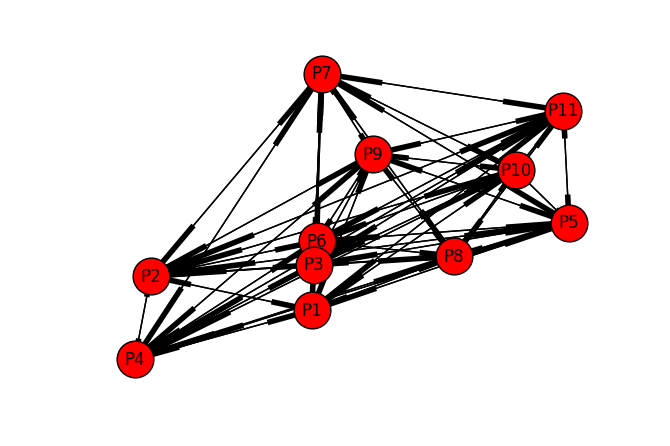

In [9]:
nx.draw(G, with_labels = True, node_size=700)
plt.show()

In [10]:
pr = nx.pagerank(G)
repr(pr)

"{'P7': 0.0194211941760637, 'P11': 0.15785301410998948, 'P6': 0.11499429713415688, 'P9': 0.14792786160181126, 'P8': 0.11323696443656019, 'P3': 0.058717644504349, 'P4': 0.03402805011653114, 'P10': 0.23090071703859866, 'P2': 0.04119514301552847, 'P5': 0.05147599990980031, 'P1': 0.03024911395661084}"

In [11]:
kz = nx.katz_centrality_numpy(G)
repr(kz)

"{'P7': -0.15309311572590653, 'P11': 0.13624705584608843, 'P3': 0.2738228784575988, 'P5': 0.14866610081432635, 'P6': 0.6654079059142652, 'P4': -0.0063385439952963595, 'P8': 0.4997998499830032, 'P10': 0.3310674267757482, 'P2': 0.11529031530968087, 'P9': 0.18168340584454326, 'P1': 0.11137572949638581}"

In [12]:
# Hand-made LTC values

LTC_P1=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P2=[1,2,3,4,5,6,7,8]
LTC_P3=[1,2,3,4,5,6,7,8]
LTC_P4=[1,2,4,5,6,7,8]
LTC_P5=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P6=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P7=[2,4,6,7,9,10,11]
LTC_P8=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P9=[4,6,7,8,9,10,11]
LTC_P10=[1,4,5,6,7,8,9,10,11]
LTC_P11=[4,5,6,7,8,9,10,11]


ltc = {'P1':11,'P2':8,'P3':8,'P4':7,'P5':11,'P6':11,'P7':7,'P8':11,'P9':7,'P10':9,'P11':8}

In [13]:
to_dataframe = []
for player in players:
    list_attributes = []
    list_attributes.append(player)
    list_attributes.append(pr[player])
    list_attributes.append(kz[player])
    list_attributes.append(float(ltc[player])/len(players))
    to_dataframe.append(list_attributes)
    
print(to_dataframe)

[['P1', 0.03024911395661084, 0.11137572949638581, 1.0], ['P2', 0.04119514301552847, 0.11529031530968087, 0.7272727272727273], ['P3', 0.058717644504349, 0.2738228784575988, 0.7272727272727273], ['P4', 0.03402805011653114, -0.0063385439952963595, 0.6363636363636364], ['P5', 0.05147599990980031, 0.14866610081432635, 1.0], ['P6', 0.11499429713415688, 0.6654079059142652, 1.0], ['P7', 0.0194211941760637, -0.15309311572590653, 0.6363636363636364], ['P8', 0.11323696443656019, 0.4997998499830032, 1.0], ['P9', 0.14792786160181126, 0.18168340584454326, 0.6363636363636364], ['P10', 0.23090071703859866, 0.3310674267757482, 0.8181818181818182], ['P11', 0.15785301410998948, 0.13624705584608843, 0.7272727272727273]]


In [14]:
df_centrality = pd.DataFrame(to_dataframe, columns=['node','pr','kz','ltc'])
df_centrality

,node,pr,kz,ltc
0,P1,0.030249,0.111376,1.000000
1,P2,0.041195,0.115290,0.727273
2,P3,0.058718,0.273823,0.727273
3,P4,0.034028,-0.006339,0.636364
4,P5,0.051476,0.148666,1.000000
5,P6,0.114994,0.665408,1.000000
6,P7,0.019421,-0.153093,0.636364
7,P8,0.113237,0.499800,1.000000
8,P9,0.147928,0.181683,0.636364
9,P10,0.230901,0.331067,0.818182


In [15]:
df_centrality.corr()

,pr,kz,ltc
pr,1.000000,0.502838,0.042418
kz,0.502838,1.000000,0.622642
ltc,0.042418,0.622642,1.000000


In [16]:
df_centrality.corr(method='spearman')

,pr,kz,ltc
pr,1.000000,0.736364,0.151797
kz,0.736364,1.000000,0.540777
ltc,0.151797,0.540777,1.000000


In [17]:
df_centrality.corr(method='kendall')

,pr,kz,ltc
pr,1.00000,0.600000,0.143940
kz,0.60000,1.000000,0.472947
ltc,0.14394,0.472947,1.000000
